In [1]:
using DataFrames
using Gadfly
using Colors

INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/ArrayViews.ji for module ArrayViews.
INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/StatsBase.ji for module StatsBase.
INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/StatsFuns.ji for module StatsFuns.
INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/DataArrays.ji for module DataArrays.
INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/GZip.ji for module GZip.
INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/SortingAlgorithms.ji for module SortingAlgorithms.
INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/Docile.ji for module Docile.
INFO: Recompiling stale cache file /Users/alanedelman/.julia/lib/v0.4/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /Users/alanedelman/.

In [3]:
using Interact

In [4]:
df = readtable("output.csv");

const years = [1993.5:0.5:2015.5;]

45-element Array{Float64,1}:
 1993.5
 1994.0
 1994.5
 1995.0
 1995.5
 1996.0
 1996.5
 1997.0
 1997.5
 1998.0
 1998.5
 1999.0
 1999.5
    ⋮  
 2010.0
 2010.5
 2011.0
 2011.5
 2012.0
 2012.5
 2013.0
 2013.5
 2014.0
 2014.5
 2015.0
 2015.5

In [5]:
nth(n) = df[find(df[:rank] .== n), :];

In [6]:
nth(1)

,rank,site,manufacturer,computer,country,year,processors,rmax,rpeak,nmax,nhalf,processor_family,processor,proc_frequency,system_family,operating_system,architecture,segment,application_area,interconnect_family,interconnect,region,continent,topyear,topmonth,power,system_model,cores,measured_size,processor_cores,accelerator,name,total_cores,accelerator_cores,effeciency_,mflops_watt,processor_technology,processor_speed_mhz_,os_family,cores_per_socket,processor_generation,previous_rank,first_appearance,first_rank,accelerator_co_processor_cores,accelerator_co_processor,efficiency_
1,1,Los Alamos National Laboratory,Thinking Machines Corporation,CM-5/1024,United States,1993,1024,59.7,131.0,52224,24064,Sparc,SuperSPARC I,32.0,TMC CM5,CMOST,MPP,Research,Not Specified,Fat Tree,"Hypercube, tree",North America,Americas,1993,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1,National Aerospace Laboratory of Japan,Fujitsu,Numerical Wind Tunnel,Japan,1993,140,124.0,235.79,31920,11950,Fujitsu,Fujitsu,105.3,Fujitsu VPP,UXP/V,MPP,Research,Aerospace,Crossbar,Full distributed crossbar,Eastern Asia,Asia,1993,11,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,Sandia National Laboratories,Intel,XP/S140,United States,1993,3680,143.4,184.0,55700,20500,Intel i860,Intel i860 Intel 80860,50.0,intel Paragon,OSF/1,MPP,Research,Not Specified,N/A,2-D mesh (torus),North America,Americas,1994,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,National Aerospace Laboratory of Japan,Fujitsu,Numerical Wind Tunnel,Japan,1993,140,170.0,235.79,42000,13800,Fujitsu,Fujitsu,105.3,Fujitsu VPP,UXP/V,MPP,Research,Aerospace,Crossbar,Full distributed crossbar,Eastern Asia,Asia,1994,11,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,National Aerospace Laboratory of Japan,Fujitsu,Numerical Wind Tunnel,Japan,1993,140,170.0,235.79,42000,13800,Fujitsu,Fujitsu,105.3,Fujitsu VPP,UXP/V,MPP,Research,Aerospace,Crossbar,Full distributed crossbar,Eastern Asia,Asia,1995,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,National Aerospace Laboratory of Japan,Fujitsu,Numerical Wind Tunnel,Japan,1993,140,170.0,235.79,42000,13800,Fujitsu,Fujitsu,105.3,Fujitsu VPP,UXP/V,MPP,Research,Aerospace,Crossbar,Full distributed crossbar,Eastern Asia,Asia,1995,11,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,University of Tokyo,Hitachi,SR2201/1024,Japan,1996,1024,220.4,307.2,138240,34560,PA-RISC,PA-RISC HARP-1E,150.0,Hitachi SR2xxx,HI-UX/MPP,MPP,Academic,Not Specified,Crossbar,Hyper crossbar,Eastern Asia,Asia,1996,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,1,"Center for Computational Science, University of Tsukuba",Hitachi,CP-PACS/2048,Japan,1996,2048,368.2,614.4,103680,30720,PA-RISC,PA-RISC HARP-1E,150.0,Hitachi SR2xxx,HI-UX/MPP,MPP,Academic,Not Specified,Crossbar,Hyper crossbar,Eastern Asia,Asia,1996,11,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,1,Sandia National Laboratories,Intel,ASCI Red,United States,1997,7264,1068.0,1453.0,215000,53400,Intel IA-32,Intel IA-32 Pentium Pro,200.0,intel Paragon,Paragon OS,MPP,Research,Not Specified,Proprietary,Proprietary,North America,Americas,1997,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,1,Sandia National Laboratories,Intel,ASCI Red,United States,1997,9152,1338.0,1830.4,235000,63000,Intel IA-32,Intel IA-32 Pentium Pro,200.0,intel Paragon,Paragon OS,MPP,Research,Not Specified,Proprietary,Proprietary,North America,Americas,1997,11,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
@showall(df)

## How the N<sup>th</sup> machine fares

Interact.Slider{Int64}([Reactive.Input{Int64}] 250,"rank",250,1:500)

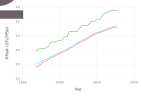

In [11]:

@manipulate for rank=1:500
    plot(
        layer(nth(1), x=years,y=:rmax, Geom.line, Theme(default_color=colorant"green")),
        layer(nth(rank), x=years,y=:rmax, Geom.line),
        layer(nth(500), x=years,y=:rmax, Geom.line, Theme(default_color=colorant"red")),
        Scale.y_log10, Guide.xlabel("Year"), Guide.ylabel("RPeak (GFLOPS/s)"),
    )
end

## Efficiency

In [13]:
firsts[:eff] = firsts[:rmax] ./ firsts[:rpeak];

LoadError: LoadError: UndefVarError: firsts not defined
while loading In[13], in expression starting on line 1

Interact.Slider{Int64}([Reactive.Input{Int64}] 250,"rank",250,1:500)

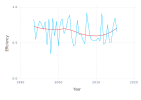

In [12]:
@manipulate for rank=1:500
    df = nth(rank)
    eff = df[:rmax] ./ df[:rpeak];

    plot(
    layer(x=years,y=eff, Geom.line),
    layer(x=years,y=eff, Geom.smooth, Theme(default_color=colorant"red")),
        Guide.xlabel("Year"), Guide.ylabel("Efficiency")
    )
end

# Number of days top 1 took to run HPL

Interact.Slider{Int64}([Reactive.Input{Int64}] 250,"rank",250,1:500)

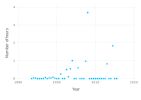

In [19]:
@manipulate for rank=1:500

x = (2/3)*((((nth(rank)[:nmax].^(3))./nth(rank)[:rmax])./3600.0).*10e-9)
plot(x=years, y=(x/24), Guide.xlabel("Year"), Guide.ylabel("Number of hours"))
end

In [129]:
df1=DataFrame(x = df[find(df[:country] .== "United States"),:][:site] |> sort |> unique);

In [130]:
writetable("locations.csv", df1)